# Ethan Pence
# CPSMA-3933-01, 12:30 PM - 1:45 PM
# Lab 4

## Problem 1

Problem Description:

 Given the system of inequalities below, determine the shape of the feasible region and find the vertices of the feasible region. Give the shape as "triangle", "quadrilateral", or "unbounded". Report your vertices starting with the one which has the smallest x-value. If more than one vertex has the same, smallest x-value, start with the one that has the smallest y-value. Proceed clockwise from the first vertex.
 
1. x + y >= 3
2. 3x + y >= 5
3. x >= 0
4. y >= 0

The shape of the feasible region is: _

The first vertex is ( _ , _ )
The second vertex is ( _ , _ )
The third vertex is ( _ , _ )

First, import requirements.

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import linprog
from itertools import combinations

Next, create range of x values, get boundary lines.

In [201]:
x_range = np.linspace(0, 5)

y0 = 3 - x_range
y1 = 5 - 3 * x_range
y2 = np.zeros_like(x_range)

Plot graph to see where intersections are.

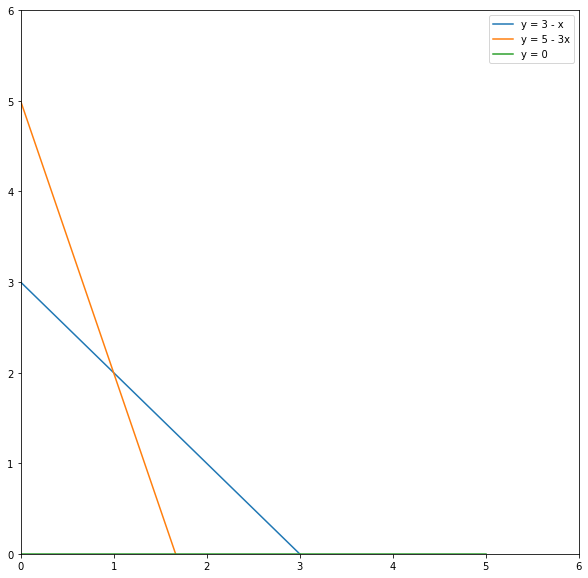

In [202]:
plt.figure(figsize=(10, 10))

plt.plot(x_range, y0, label="y = 3 - x")
plt.plot(x_range, y1, label="y = 5 - 3x")
plt.plot(x_range, y2, label="y = 0")

plt.xlim(0, 6)
plt.ylim(0, 6)

plt.legend()

Find corner points.
1. Intersection of 3x + y = 5 and x = 0
2. Intersection of x + y = 3 and 3x + y = 5
3. Intersection of x + y = 3 and y = 0

In [203]:
x, y = sp.symbols("x y")

eq1 = sp.Eq(y, 5 - 3 * x)
eq2 = sp.Eq(y, 3 - x)
eq3 = sp.Eq(x, 0)
eq4 = sp.Eq(y, 0)

sol_1 = sp.solve([eq1, eq3], (x, y))
sol_2 = sp.solve([eq1, eq2], (x, y))
sol_3 = sp.solve([eq2, eq4], (x, y))

Plot final graph.

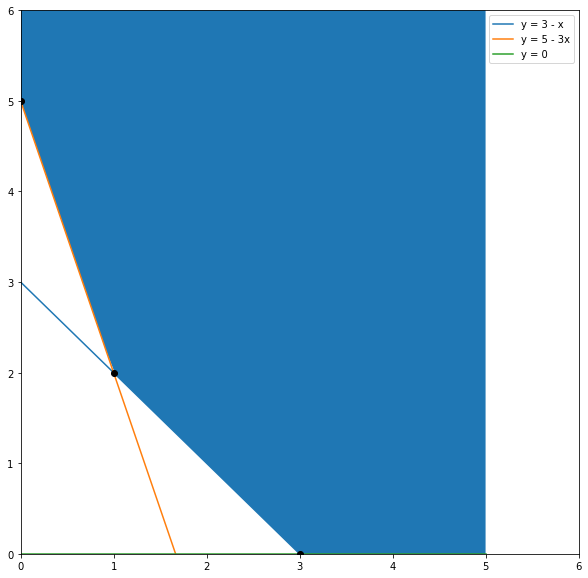

In [204]:
plt.figure(figsize=(10, 10))

plt.plot(x_range, y0, label="y = 3 - x")
plt.plot(x_range, y1, label="y = 5 - 3x")
plt.plot(x_range, y2, label="y = 0")


plt.xlim(0, 6)
plt.ylim(0, 6)

plt.plot(sol_1[x], sol_1[y], "o", color='black')
plt.plot(sol_2[x], sol_2[y], "o", color='black')
plt.plot(sol_3[x], sol_3[y], "o", color='black')

plt.fill_between(x_range, np.maximum(y0, y1), 6)

plt.legend()

The region is unbounded, so no maximum value exists.

Set matrix with x, y, s1, s2

In [205]:
A = np.array([
    [1, 1, -1, 0],
    [3, 1, 0, -1]
])

b = np.array([3, 5])

Find basic solutions

In [206]:
var_indices = range(4)

non_basic = list(combinations(var_indices, 2))

solutions = []

for pair in non_basic:
    basic_indice = [i for i in range(4) if i not in pair]
    a = A[:, basic_indice]
    solution = np.zeros(4)
    
    try:
        basic_solution = np.linalg.solve(a, b)
        
        for i, val in zip(basic_indice, basic_solution):
            solution[i] = val
        
        if np.all(solution >= -1e-9):
            solutions.append(solution)
            
    except:
        pass
    
for sol in solutions:
    print(f"x = {sol[0]}, y = {sol[1]}")

x = 0.0, y = 5.0
x = 3.0, y = 0.0
x = 1.0, y = 2.0


Built in linear programming solver:

In [207]:
p = [-3, -2]
a = [[-1, -1], [-3, -1]]
b = [-3, -5]

x_bound = (0, None)
y_bound = (0, None)

result = linprog(p, a, b, bounds=[x_bound, y_bound])
print(result)

     con: array([], dtype=float64)
     fun: -33205855978.62535
 message: 'The algorithm terminated successfully and determined that the problem is unbounded.'
     nit: 4
   slack: array([1.41864878e+10, 2.38522486e+10])
  status: 3
 success: False
       x: array([4.83288040e+09, 9.35360739e+09])


Both of my answers correctly state that the function is unbounded.

## Problem 2


\begin{align*}
    & \text{Let x = deluxe boards. Let y = standard boards.} \\
    & \text{maximize P = 210x + 150y} \\
    & 30x + 15y \le 1035 \text{  hours} \\
    & 90x + 75y \le 3975 \text{  material} \\
    & x, y \ge 0
\end{align*}

Next, create range of x values, get boundary lines.

In [208]:
x_range = np.linspace(0, 40)

y0 = 69 - 2 * x_range
y1 = (265 - 6 * x_range) / 5
y2 = np.zeros_like(x_range)

Plot graph to see where intersections are.

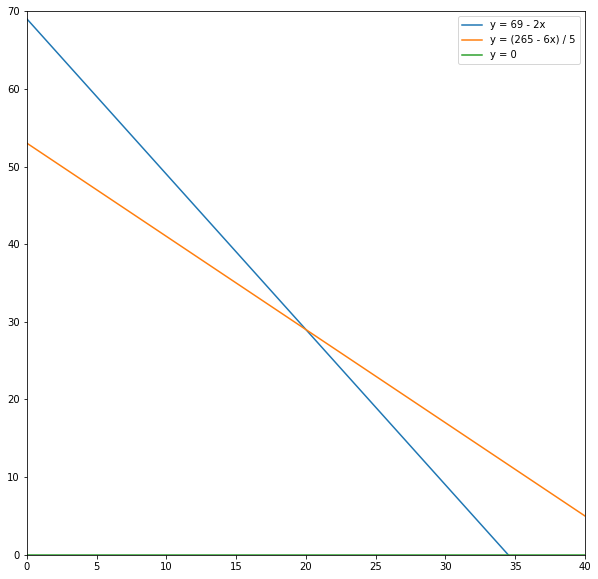

In [209]:
plt.figure(figsize=(10, 10))

plt.plot(x_range, y0, label="y = 69 - 2x")
plt.plot(x_range, y1, label="y = (265 - 6x) / 5")
plt.plot(x_range, y2, label="y = 0")

plt.xlim(0, 40)
plt.ylim(0, 70)

plt.legend()

Find corner points.
1. Intersection of 2x + y = 69 and x = 0.
2. Intersection of 2x + y = 69 and 6x + 5y = 265
3. Intersection of 6x + 5y = 265 and y = 0

In [210]:
x, y = sp.symbols("x y")

eq1 = sp.Eq(y, (265 - 6 * x) / 5)
eq2 = sp.Eq(y, 69 - 2 * x)
eq3 = sp.Eq(x, 0)
eq4 = sp.Eq(y, 0)

sol_1 = sp.solve([eq1, eq3], (x, y))
sol_2 = sp.solve([eq1, eq2], (x, y))
sol_3 = sp.solve([eq2, eq4], (x, y))

Plot final graph.

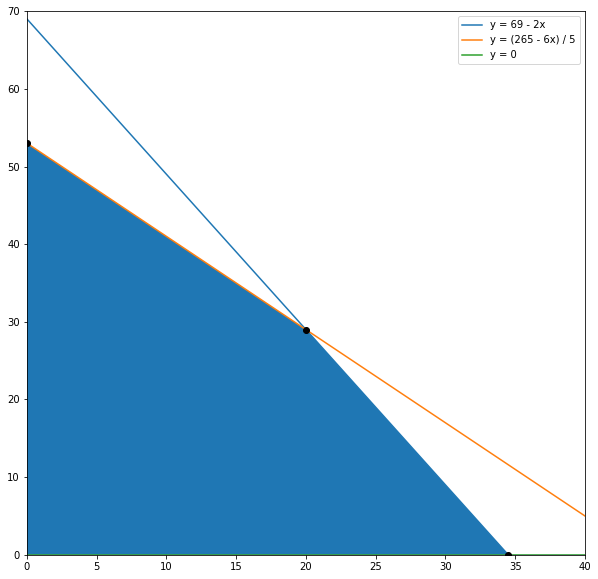

In [211]:
plt.figure(figsize=(10, 10))

plt.plot(x_range, y0, label="y = 69 - 2x")
plt.plot(x_range, y1, label="y = (265 - 6x) / 5")
plt.plot(x_range, y2, label="y = 0")

plt.xlim(0, 40)
plt.ylim(0, 70)

plt.plot(sol_1[x], sol_1[y], "o", color='black')
plt.plot(sol_2[x], sol_2[y], "o", color='black')
plt.plot(sol_3[x], sol_3[y], "o", color='black')

plt.fill_between(x_range, 0, np.minimum(y0, y1))

plt.legend()

The region is bounded, so a maximum value exists. The maximum value is at (20, 29).

Set matrix with x, y, s1, s2

In [212]:
# 2x + y <= 69, 6x + 5y <= 265

A = np.array([[2, 1, 1, 0], [6, 5, 0, 1]])
b = np.array([69, 265])
names = ["x", "y", "s1", "d2"]

Find basic solutions.

In [213]:
solutions = []

for basic in combinations(range(4), 2):
    AB = A[:, basic]
    
    try:
        xB = np.linalg.solve(AB, b)
        
        x_all = np.zeros(4)
        x_all[list(basic)] = xB
        
        if np.all(x_all >= -1e-9):
            solutions.append(x_all)
        
    except:
        pass
    
for sol in solutions:
    print(f"x = {sol[0]}, y = {sol[1]}")

x = 20.0, y = 29.0
x = 34.5, y = 0.0
x = 0.0, y = 53.0
x = 0.0, y = 0.0


Built in linear programming solver:

In [214]:
p = [-210, -150]
a = [[2, 1], [6, 5]]
b = [69, 265]

x_bound = (0, None)
y_bound = (0, None)

result = linprog(p, a, b, bounds=[x_bound, y_bound])
print(result)

     con: array([], dtype=float64)
     fun: -8549.998700892285
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.03937217e-05, 4.04152511e-05])
  status: 0
 success: True
       x: array([19.99999711, 28.99999538])
